# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     649.8
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           1.20e-37
Time:                        13:09:29   Log-Likelihood:                -8.9146
No. Observations:                  50   AIC:                             25.83
Df Residuals:                      46   BIC:                             33.48
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8648      0.103     47.338      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.32249004  4.83737063  5.30931119  5.70846674  6.01576318  6.22603115
  6.3488553   6.4069996   6.43266726  6.46220985  6.53015481  6.66353272
  6.87743625  7.17254045  7.53499188  7.93868465  8.34954958  8.73115164
  9.05067615  9.28432013  9.42120303  9.46515443  9.43408482  9.35704293
  9.26944318  9.2072471   9.20105505  9.27107856  9.42381973  9.65100291
  9.93093433 10.23206642 10.51818089 10.75433933 10.91262353 10.97672229
 10.94461135 10.82888598 10.65469158 10.45559237 10.2680569  10.12546635
 10.05263012 10.06170969 10.15022055 10.30144037 10.48715645 10.67230097
 10.82071258 10.90107754]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.87664007 10.70770445 10.41574642 10.04970643  9.67400731  9.35278135
  9.13416848  9.03852988  9.05346291  9.13683769]


## Plot comparison

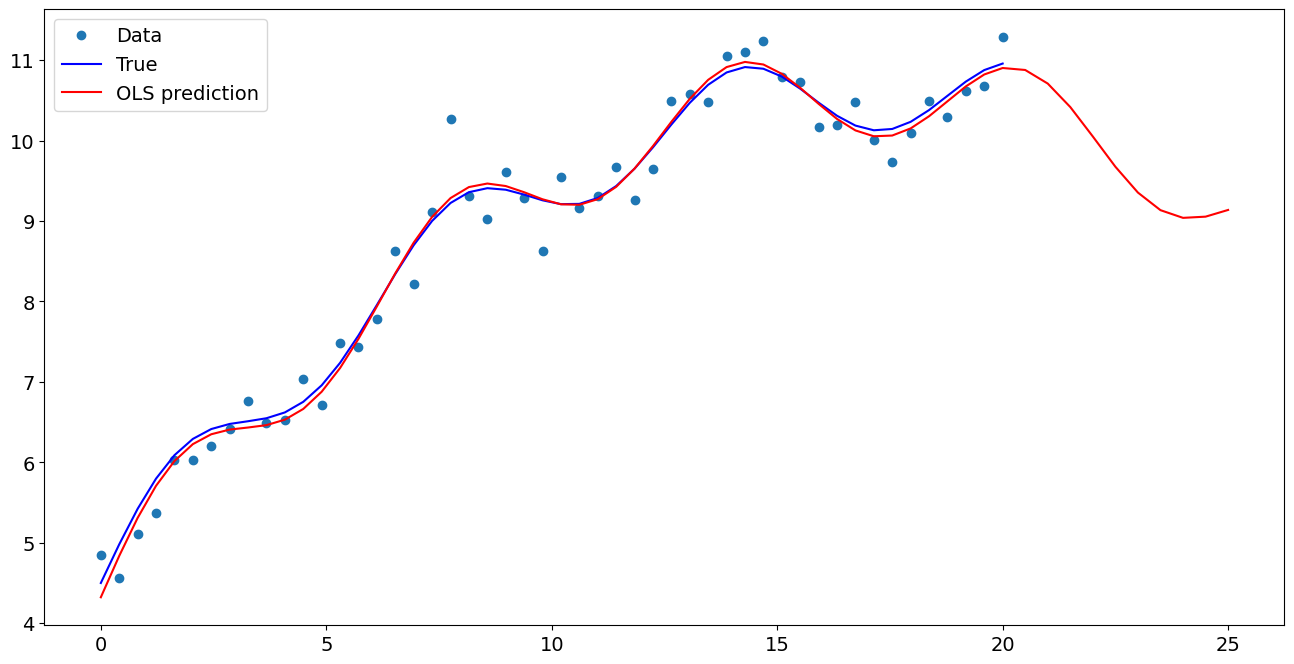

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.864784
x1                  0.520849
np.sin(x1)          0.547623
I((x1 - 5) ** 2)   -0.021692
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.876640
1    10.707704
2    10.415746
3    10.049706
4     9.674007
5     9.352781
6     9.134168
7     9.038530
8     9.053463
9     9.136838
dtype: float64